## Windy Gridworld - SARSA (on-policy TD control)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(2025)
n_rows = 7
n_cols = 10 
start = (3, 0)
goal = (3, 7)
wind_strengths = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0])

In [3]:
def transition(s, a):
    x, y = s 
    if a == 'u':
        x = np.max([0, x-1-wind_strengths[y]])
    elif a == 'd':
        x_prime = x + 1 - wind_strengths[y]
        x = np.max([0, x_prime])
        x = np.min([x, n_rows-1])
    elif a == 'l':
        x = np.max([0, x - wind_strengths[y]])
        y = np.max([0, y-1])        
    elif a == 'r':
        x = np.max([0, x - wind_strengths[y]])
        y = np.min([y+1, n_cols-1])        
    
    return (x, y)

In [4]:
s_prime = transition((4, 8), 'l')
print(s_prime)

(3, 7)


In [5]:
epsilon = 0.1
alpha = 0.5
n_episodes = 250

In [6]:
actions = ['u', 'd', 'l', 'r']
Qs = {
    (x, y): np.zeros(len(actions)) for x in np.arange(n_rows) for y in np.arange(n_cols)
}

In [7]:
n_steps = 0 
counts = np.zeros(n_episodes)
trajectory_last_episode = [] 

for epI in np.arange(n_episodes):
    s = start 
    randnum = np.random.rand()
    if randnum > epsilon:
        # aI = np.argmax(Qs[s]) 
        aI = np.random.choice([i for i in np.arange(len(actions)) if Qs[s][i] == np.max(Qs[s])]) 
    else:
        aI = np.random.randint(len(actions))
    a = actions[aI]
    if epI == n_episodes - 1:
        trajectory_last_episode.append(s)
        trajectory_last_episode.append(a) 
    
    while s != goal:
        s_prime = transition(s, a) 
        r = -1 

        randnum = np.random.rand()
        if randnum > epsilon:
            # aI_prime = np.argmax(Qs[s_prime])
            aI_prime = np.random.choice([i for i in np.arange(len(actions)) if Qs[s_prime][i] == np.max(Qs[s_prime])])
        else:
            aI_prime = np.random.randint(len(actions))
        a_prime = actions[aI_prime]

        Qs[s][aI] += alpha * (r + Qs[s_prime][aI_prime] - Qs[s][aI]) 

        if epI == n_episodes - 1:            
            trajectory_last_episode.append(s_prime)
            trajectory_last_episode.append(a_prime) 

        s = s_prime 
        a = a_prime
        aI = aI_prime 

        n_steps += 1         

    counts[epI] = n_steps 

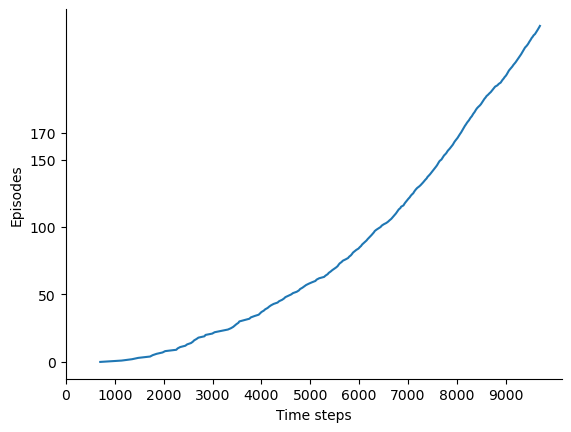

In [8]:
fig, ax = plt.subplots() 
ax.plot(counts, np.arange(n_episodes))
ax.set_xlabel('Time steps')
ax.set_ylabel('Episodes')
ax.set_yticks([0, 50, 100, 150, 170]) 
ax.set_xticks(np.arange(0, 10000, 1000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 

The increasing slope indicates that the goal is reached more quickly over time. 

In [9]:
print(trajectory_last_episode)

[(3, 0), 'r', (3, 1), 'r', (3, 2), 'r', (3, 3), 'r', (2, 4), 'r', (1, 5), 'r', (0, 6), 'r', (0, 7), 'r', (0, 8), 'r', (0, 9), 'd', (1, 9), 'd', (2, 9), 'd', (3, 9), 'd', (4, 9), 'l', (4, 8), 'l', (3, 7), 'd']


In [10]:
len(trajectory_last_episode)

32

In [23]:
Qs[(3,0)]

array([-17.48510925, -17.80437071, -18.18212454, -17.19488097])

In [24]:
Qs[(3,1)]

array([-16.58581135, -16.70992595, -17.29155365, -15.84790495])

In [25]:
Qs[(3,2)]

array([-15.53841712, -15.64636853, -16.85741595, -14.58433099])

In [26]:
Qs[(3,3)]

array([-14.64691266, -14.88594991, -15.16234883, -13.43591697])

In [27]:
Qs[(2,4)]

array([-13.66334135, -13.84896497, -14.50803138, -12.33312181])

In [29]:
Qs[(1,5)]

array([-13.23459091, -13.4280222 , -12.7820348 , -11.3957094 ])

In [30]:
Qs[(0,6)]

array([-11.61119512, -13.52307337, -13.83543508, -10.91953128])

In [31]:
Qs[(0,7)]

array([-11.63828116, -11.27059651, -11.8647528 ,  -9.87646985])

In [32]:
Qs[(0,8)]

array([-10.07682389,  -9.77650284, -10.09356895,  -8.30075862])

In [33]:
Qs[(0,9)]

array([-7.98060901, -7.22335071, -9.94131448, -9.34492891])

In [34]:
Qs[(1,9)]

array([-10.09645249,  -6.00970631,  -8.83923988,  -7.20295952])

In [35]:
Qs[(2,9)]

array([-8.07489014, -4.41101617, -7.73053301, -7.99581875])

In [36]:
Qs[(3,9)]

array([-7.67746592, -3.02522583, -7.14832878, -4.80206002])

In [37]:
Qs[(4,9)]

array([-5.14079667, -4.87190667, -2.00048786, -3.78914383])

In [39]:
Qs[(4,8)]

array([-7.64058731, -1.99957275, -1.        , -3.97726152])

In [40]:
Qs[(3,7)]

array([0., 0., 0., 0.])